In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

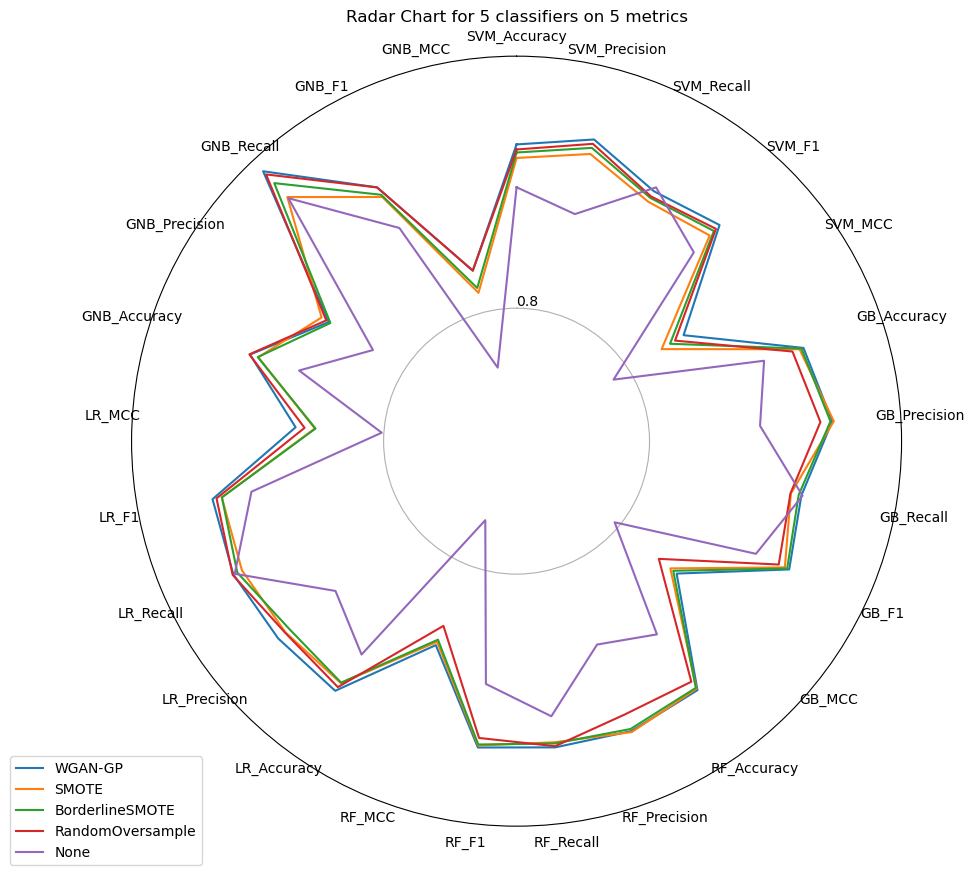

In [32]:

# 数据示例，替换为你的实际数据
methods = ['WGAN-GP', 'SMOTE', 'BorderlineSMOTE', 'RandomOversample', 'None']
metrics = ["Accuracy","Precision","Recall","F1","MCC"]
classifiers = ["SVM","GB","RF","LR","GNB"]
indicators = []
for classifier in classifiers:
    for metric in metrics:
        indicators.append(f'{classifier}_{metric}')

# 角度设置
angles = np.linspace(0, 2 * np.pi, len(indicators), endpoint=False)
# 使雷达图封闭
# data = np.concatenate((data, data[:, 0:1]), axis=1)
angles = np.concatenate((angles, [angles[0]]))

# 创建雷达图
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rorigin(0.7)
# 绘制雷达图
for i, method in enumerate(methods):
    data = pd.read_csv(path.join("result",f'{method}.csv'),sep='\t',index_col=0)
    row = []
    
    for classifier in classifiers:
        for metric in metrics:
            row.append(data.loc[classifier,metric])
            # indicators.append(f'{classifier}_{metric}')
    row.append(data.loc["SVM","Accuracy"])
    ax.plot(angles, row, label=method)

# 添加标签
ax.set_thetagrids(angles[:-1] * 180/np.pi, indicators)
ax.set_rlabel_position(0)

# 添加网格线
# ax.set_rgrids(np.arange(0.7, 1.0, 0.08), labels=[str(i) for i in np.arange(0.7, 1.0, 0.1)], angle=0)

# 添加图例
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# 设置标题
plt.title('Radar Chart for 5 classifiers on 5 metrics')

plt.savefig('plot_radar.svg',  bbox_inches='tight')
# 显示图形
plt.show()

